# Анализирем Файл, вытащим из них все акты настроки и посмотрим закономерности v2

In [1]:
from matplotlib import pyplot as plt

from halpers import load_all_series, Fragment, RawPoint

In [2]:
%load_ext autoreload
%autoreload 2

Загрузка данных из всех доступных файлов в папке data

In [2]:
file = 'data/freq_26-09-2023_10h-11m.log-fragments.json'

global_shots: list[Fragment] = load_all_series(file)

Находим в данных все акты настройки и собираем их в один список

In [3]:
zero_aligned_shorts = []
for shot in global_shots:
    start_ts = shot.start_timestamp
    min_val = shot.raw_points[shot.min_index].y

    zero_aligned_short = Fragment(start_timestamp=start_ts,
                                   raw_points=[
                                       RawPoint(x=p.x - start_ts, y=p.y - min_val) for p in shot.raw_points],
                                   min_index=shot.min_index,
                                   coeffs=shot.coeffs)
    zero_aligned_shorts.append(zero_aligned_short)


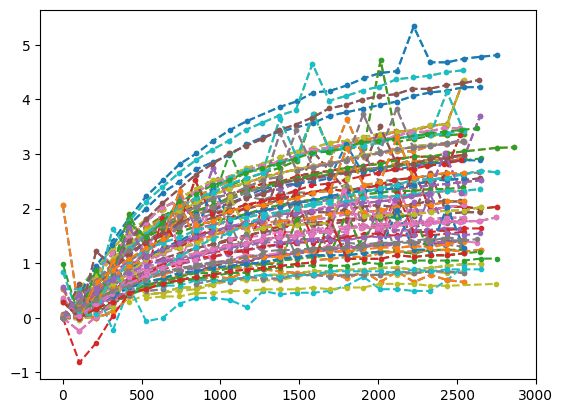

In [4]:
longes_serie = 0
for shot in zero_aligned_shorts:
    if len(shot.raw_points) > 10:
        longes_serie = max(longes_serie, len(shot.raw_points))
        plt.plot([p.x for p in shot.raw_points], [p.y for p in shot.raw_points], '.--')

### Рассеяние изменения частоты

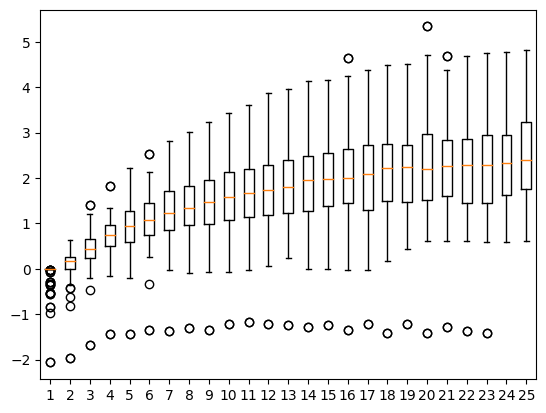

In [5]:
points = [[] for _ in range(longes_serie)]
for shot in zero_aligned_shorts:
    if len(shot.raw_points) > 10:
        start_val = shot.raw_points[0].y
        for i, p in enumerate(shot.raw_points[shot.min_index:]):
            points[i].append(p.y - start_val)

_ = plt.boxplot(points)